In [ ]:
#kmeans

In [33]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt

In [34]:
#flower data set

In [35]:
from sklearn.datasets import load_iris
iris=load_iris()

In [36]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
data=pd.DataFrame(iris.data,columns=iris.feature_names)

In [39]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
data=data.drop(["sepal length (cm)"],axis='columns')

In [41]:
data=data.drop(["sepal width (cm)"],axis='columns')

In [42]:
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [43]:
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'Petal width')

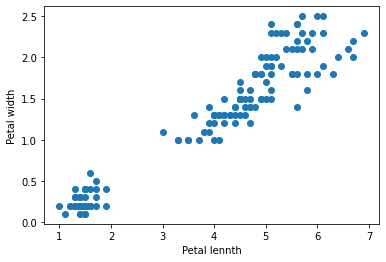

In [44]:
plt.scatter(data["petal length (cm)"],data["petal width (cm)"])
plt.xlabel('Petal lennth')
plt.ylabel('Petal width')

In [45]:
sse= []
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.91690875790876,
 11.08722366260479,
 9.203314009661833,
 7.615402244955954,
 6.57117684766214]

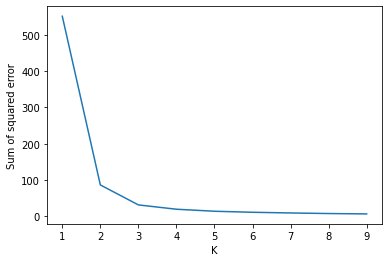

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [48]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(data[['petal length (cm)','petal width (cm)']])#predict point in which cluster
data['cluster']=y_predicted
data.head()
km.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

No handles with labels found to put in legend.


Text(0, 0.5, 'petal width')

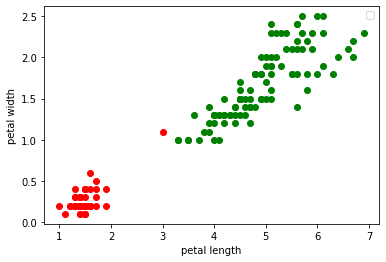

In [49]:
data1=data[data['cluster']==0]
data2=data[data['cluster']==1]
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color='Red')
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color='Green')
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')

In [52]:
from sklearn.preprocessing import MinMaxScaler
sca=MinMaxScaler()
sca.fit(data[['petal width (cm)']])
data['petal width (cm)']=sca.transform(data[['petal width (cm)']])
sca.fit(data[['petal length (cm)']])
data['petal length (cm)']=sca.transform(data[['petal length (cm)']])

In [53]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(data[['petal length (cm)','petal width (cm)']])
data['cluster']=y_predicted
data.head()
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.6620339 , 0.65666667]])

No handles with labels found to put in legend.


Text(0, 0.5, 'petal width')

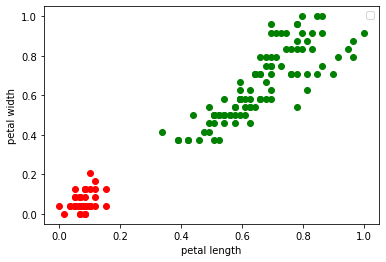

In [54]:
data1=data[data['cluster']==0]
data2=data[data['cluster']==1]
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color='Red')
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color='Green')
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')

In [55]:
sse= []
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6798101576314028,
 0.5651273455703979,
 0.48617893493425096,
 0.4362325665717068]

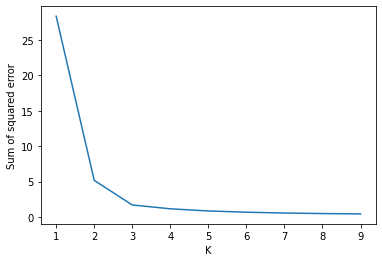

In [56]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [ ]:
#Dummy

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
data=pd.read_csv('carprices.csv')


In [ ]:
data

In [ ]:
dummies=pd.get_dummies(data.Car_Model)
merge=pd.concat([data,dummies],axis=1)
merge=merge.drop(['Car_Model'],axis=1)
merge


In [4]:
X=merge.drop(['Sell_Price'],axis=1)
Y=merge.Sell_Price
model=linear_model.LinearRegression()
model.fit(X,Y)



LinearRegression()

In [5]:
model.predict([[45000,4,0,0,1]])

array([36991.31721061])

In [6]:
model.predict([[86000,7,0,1,0]])

array([11080.74313219])

In [7]:
model.score(X,Y)


0.9417050937281083

In [8]:
#One_Hot_Encoder

In [9]:
x=merge.drop(['Sell_Price'],axis=1)
y=merge.Sell_Price

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ts = ColumnTransformer(transformers=[("abc", OneHotEncoder(), [1] )],remainder='passthrough' )
X = ts.fit_transform(X)

In [11]:
X

array([[0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 6.90e+04, 0.00e+00, 1.00e+00, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 3.50e+04, 0.00e+00, 1.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 5.70e+04, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 2.25e+04, 0.00e+00, 1.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 4.60e+04, 0.00e+00, 1.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 5.90e+04, 1.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 5.20e+04, 1.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 7.20e+04, 1.00e+00, 0.00e

In [12]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [13]:
model.predict([[45000,4,0,0,1]])

array([36991.31721061])

In [14]:
model.score(x,y)

0.9417050937281083

In [15]:
model.predict([[86000,7,0,1,0]])

array([11080.74313219])

In [26]:
sse= []
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.161523409420557,
 0.8535683225340074,
 0.6800800986587507,
 0.5651273455703979,
 0.48617893493425096,
 0.41684376235112913]